In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
pd.pandas.set_option("display.max_columns",None)
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,roc_auc_score
from sklearn.metrics import roc_curve, auc

In [2]:
df=pd.read_csv("IT_3.csv")

In [3]:
df.head()

,ID,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Age_bucket,EngineHP_bucket,Years_Experience_bucket,Miles_driven_annually_bucket,credit_history_bucket,State
0,1,1,F,522,656,1,0,Married,Car,14749.0,5,<18,>350,<3,<15k,Fair,IL
1,2,1,F,691,704,16,0,Married,Car,15389.0,6,28-34,>350,15-30,15k-25k,Good,NJ
2,3,1,M,133,691,15,0,Married,Van,9956.0,3,>40,90-160,15-30,<15k,Good,CT
3,4,1,M,146,720,9,0,Married,Van,77323.0,3,18-27,90-160,9-14',>25k,Good,CT
4,5,1,M,128,771,33,1,Married,Van,14183.0,4,>40,90-160,>30,<15k,Very Good,WY


,ID,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Age_bucket,EngineHP_bucket,Years_Experience_bucket,Miles_driven_annually_bucket,credit_history_bucket,State
0,1,1,F,522,656,1,0,Married,Car,14749.0,5,<18,>350,<3,<15k,Fair,IL
1,2,1,F,691,704,16,0,Married,Car,15389.0,6,28-34,>350,15-30,15k-25k,Good,NJ
2,3,1,M,133,691,15,0,Married,Van,9956.0,3,>40,90-160,15-30,<15k,Good,CT
3,4,1,M,146,720,9,0,Married,Van,77323.0,3,18-27,90-160,9-14',>25k,Good,CT
4,5,1,M,128,771,33,1,Married,Van,14183.0,4,>40,90-160,>30,<15k,Very Good,WY


In [4]:
df.drop(["ID","State"],axis=1,inplace=True)

In [5]:
df.head()

,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Age_bucket,EngineHP_bucket,Years_Experience_bucket,Miles_driven_annually_bucket,credit_history_bucket
0,1,F,522,656,1,0,Married,Car,14749.0,5,<18,>350,<3,<15k,Fair
1,1,F,691,704,16,0,Married,Car,15389.0,6,28-34,>350,15-30,15k-25k,Good
2,1,M,133,691,15,0,Married,Van,9956.0,3,>40,90-160,15-30,<15k,Good
3,1,M,146,720,9,0,Married,Van,77323.0,3,18-27,90-160,9-14',>25k,Good
4,1,M,128,771,33,1,Married,Van,14183.0,4,>40,90-160,>30,<15k,Very Good


,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Age_bucket,EngineHP_bucket,Years_Experience_bucket,Miles_driven_annually_bucket,credit_history_bucket
0,1,F,522,656,1,0,Married,Car,14749.0,5,<18,>350,<3,<15k,Fair
1,1,F,691,704,16,0,Married,Car,15389.0,6,28-34,>350,15-30,15k-25k,Good
2,1,M,133,691,15,0,Married,Van,9956.0,3,>40,90-160,15-30,<15k,Good
3,1,M,146,720,9,0,Married,Van,77323.0,3,18-27,90-160,9-14',>25k,Good
4,1,M,128,771,33,1,Married,Van,14183.0,4,>40,90-160,>30,<15k,Very Good


In [6]:
df.describe()


,target,EngineHP,credit_history,Years_Experience,annual_claims,Miles_driven_annually,size_of_family
count,30240.00000,30240.000000,30240.000000,30240.000000,30240.000000,30232.000000,30240.000000
mean,0.70754,196.604266,685.769775,13.255721,1.138459,17422.938939,4.521296
std,0.45490,132.346961,102.454307,9.890246,1.082913,17483.782840,2.286531
min,0.00000,80.000000,300.000000,1.000000,0.000000,5000.000000,1.000000
25%,0.00000,111.000000,668.000000,5.000000,0.000000,9668.500000,3.000000
50%,1.00000,141.000000,705.000000,10.000000,1.000000,12280.000000,5.000000
75%,1.00000,238.000000,753.000000,20.000000,2.000000,14697.250000,7.000000
max,1.00000,1005.000000,850.000000,40.000000,4.000000,99943.000000,8.000000


,target,EngineHP,credit_history,Years_Experience,annual_claims,Miles_driven_annually,size_of_family
count,30240.00000,30240.000000,30240.000000,30240.000000,30240.000000,30232.000000,30240.000000
mean,0.70754,196.604266,685.769775,13.255721,1.138459,17422.938939,4.521296
std,0.45490,132.346961,102.454307,9.890246,1.082913,17483.782840,2.286531
min,0.00000,80.000000,300.000000,1.000000,0.000000,5000.000000,1.000000
25%,0.00000,111.000000,668.000000,5.000000,0.000000,9668.500000,3.000000
50%,1.00000,141.000000,705.000000,10.000000,1.000000,12280.000000,5.000000
75%,1.00000,238.000000,753.000000,20.000000,2.000000,14697.250000,7.000000
max,1.00000,1005.000000,850.000000,40.000000,4.000000,99943.000000,8.000000


In [7]:
df.shape

(30240, 15)

(30240, 15)

In [8]:
df.isnull().sum()

target                          0
Gender                          0
EngineHP                        0
credit_history                  0
Years_Experience                0
annual_claims                   0
Marital_Status                  0
Vehical_type                    0
Miles_driven_annually           8
size_of_family                  0
Age_bucket                      0
EngineHP_bucket                 0
Years_Experience_bucket         0
Miles_driven_annually_bucket    8
credit_history_bucket           0
dtype: int64

target                          0
Gender                          0
EngineHP                        0
credit_history                  0
Years_Experience                0
annual_claims                   0
Marital_Status                  0
Vehical_type                    0
Miles_driven_annually           8
size_of_family                  0
Age_bucket                      0
EngineHP_bucket                 0
Years_Experience_bucket         0
Miles_driven_annually_bucket    8
credit_history_bucket           0
dtype: int64

In [9]:
df=df=df.fillna(method='ffill')
df

,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Age_bucket,EngineHP_bucket,Years_Experience_bucket,Miles_driven_annually_bucket,credit_history_bucket
0,1,F,522,656,1,0,Married,Car,14749.0,5,<18,>350,<3,<15k,Fair
1,1,F,691,704,16,0,Married,Car,15389.0,6,28-34,>350,15-30,15k-25k,Good
2,1,M,133,691,15,0,Married,Van,9956.0,3,>40,90-160,15-30,<15k,Good
3,1,M,146,720,9,0,Married,Van,77323.0,3,18-27,90-160,9-14',>25k,Good
4,1,M,128,771,33,1,Married,Van,14183.0,4,>40,90-160,>30,<15k,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30235,1,F,398,491,6,3,Single,Truck,14509.0,2,35-40,>350,3-8',>25k,Very Poor
30236,0,M,128,745,22,4,Single,Utility,8597.0,6,>40,90-160,15-30,<15k,Very Good
30237,0,M,89,523,4,1,Married,Truck,49747.0,2,<18,<90,3-8',>25k,Very Poor
30238,1,F,129,703,14,1,Married,Truck,7553.0,1,>40,90-160,9-14',<15k,Good


,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Age_bucket,EngineHP_bucket,Years_Experience_bucket,Miles_driven_annually_bucket,credit_history_bucket
0,1,F,522,656,1,0,Married,Car,14749.0,5,<18,>350,<3,<15k,Fair
1,1,F,691,704,16,0,Married,Car,15389.0,6,28-34,>350,15-30,15k-25k,Good
2,1,M,133,691,15,0,Married,Van,9956.0,3,>40,90-160,15-30,<15k,Good
3,1,M,146,720,9,0,Married,Van,77323.0,3,18-27,90-160,9-14',>25k,Good
4,1,M,128,771,33,1,Married,Van,14183.0,4,>40,90-160,>30,<15k,Very Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30235,1,F,398,491,6,3,Single,Truck,14509.0,2,35-40,>350,3-8',>25k,Very Poor
30236,0,M,128,745,22,4,Single,Utility,8597.0,6,>40,90-160,15-30,<15k,Very Good
30237,0,M,89,523,4,1,Married,Truck,49747.0,2,<18,<90,3-8',>25k,Very Poor
30238,1,F,129,703,14,1,Married,Truck,7553.0,1,>40,90-160,9-14',<15k,Good


In [10]:
df.isnull().sum()

target                          0
Gender                          0
EngineHP                        0
credit_history                  0
Years_Experience                0
annual_claims                   0
Marital_Status                  0
Vehical_type                    0
Miles_driven_annually           0
size_of_family                  0
Age_bucket                      0
EngineHP_bucket                 0
Years_Experience_bucket         0
Miles_driven_annually_bucket    0
credit_history_bucket           0
dtype: int64

target                          0
Gender                          0
EngineHP                        0
credit_history                  0
Years_Experience                0
annual_claims                   0
Marital_Status                  0
Vehical_type                    0
Miles_driven_annually           0
size_of_family                  0
Age_bucket                      0
EngineHP_bucket                 0
Years_Experience_bucket         0
Miles_driven_annually_bucket    0
credit_history_bucket           0
dtype: int64

In [11]:
df.columns

Index(['target', 'Gender', 'EngineHP', 'credit_history', 'Years_Experience',
       'annual_claims', 'Marital_Status', 'Vehical_type',
       'Miles_driven_annually', 'size_of_family', 'Age_bucket',
       'EngineHP_bucket', 'Years_Experience_bucket',
       'Miles_driven_annually_bucket', 'credit_history_bucket'],
      dtype='object')

Index(['target', 'Gender', 'EngineHP', 'credit_history', 'Years_Experience',
       'annual_claims', 'Marital_Status', 'Vehical_type',
       'Miles_driven_annually', 'size_of_family', 'Age_bucket',
       'EngineHP_bucket', 'Years_Experience_bucket',
       'Miles_driven_annually_bucket', 'credit_history_bucket'],
      dtype='object')

In [12]:
df.nunique()

target                              2
Gender                              2
EngineHP                          648
credit_history                    551
Years_Experience                   40
annual_claims                       5
Marital_Status                      2
Vehical_type                        4
Miles_driven_annually           14881
size_of_family                      8
Age_bucket                          5
EngineHP_bucket                     4
Years_Experience_bucket             5
Miles_driven_annually_bucket        3
credit_history_bucket               5
dtype: int64

target                              2
Gender                              2
EngineHP                          648
credit_history                    551
Years_Experience                   40
annual_claims                       5
Marital_Status                      2
Vehical_type                        4
Miles_driven_annually           14881
size_of_family                      8
Age_bucket                          5
EngineHP_bucket                     4
Years_Experience_bucket             5
Miles_driven_annually_bucket        3
credit_history_bucket               5
dtype: int64

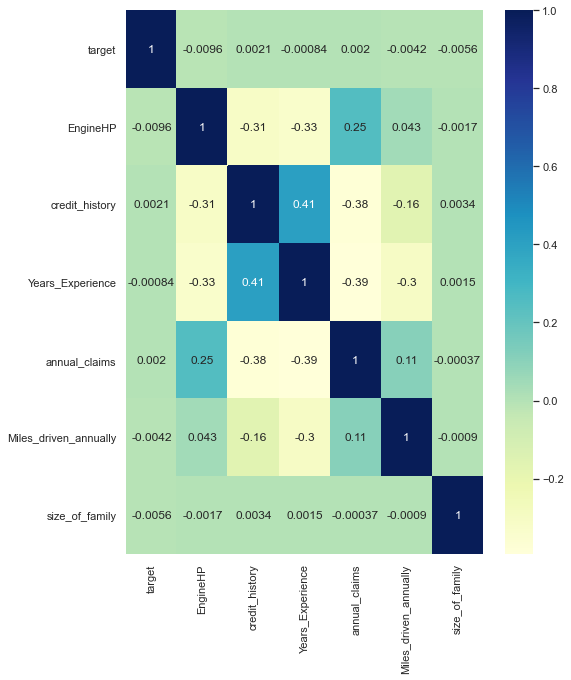

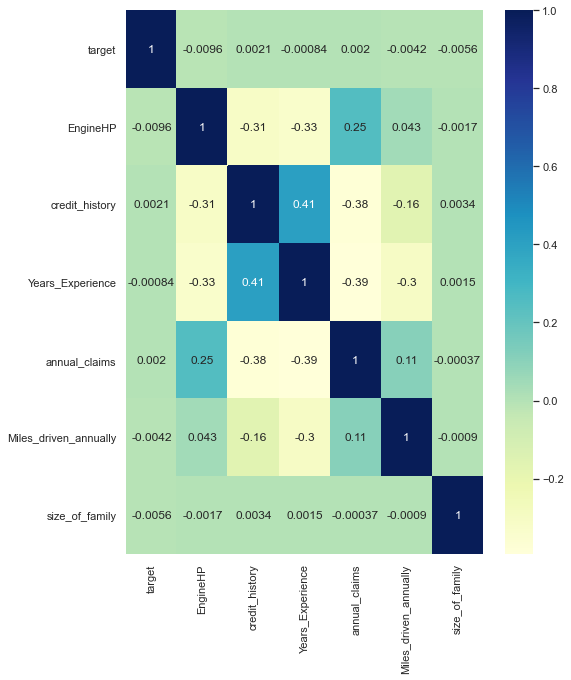

In [13]:
sns.set(rc={"figure.figsize":(8,10)})
sns.heatmap(data=df.corr(),cmap="YlGnBu",annot=True)

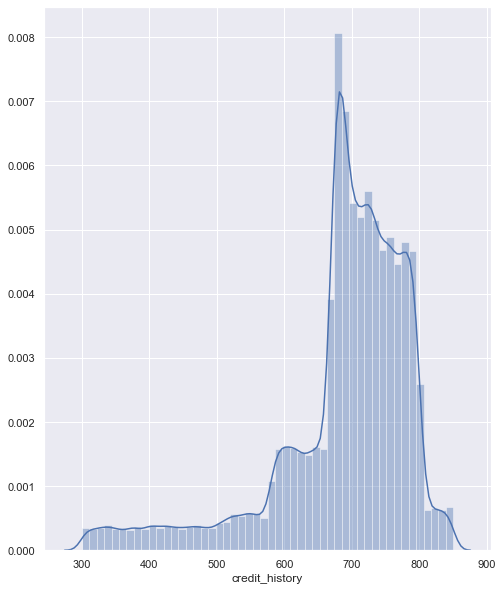

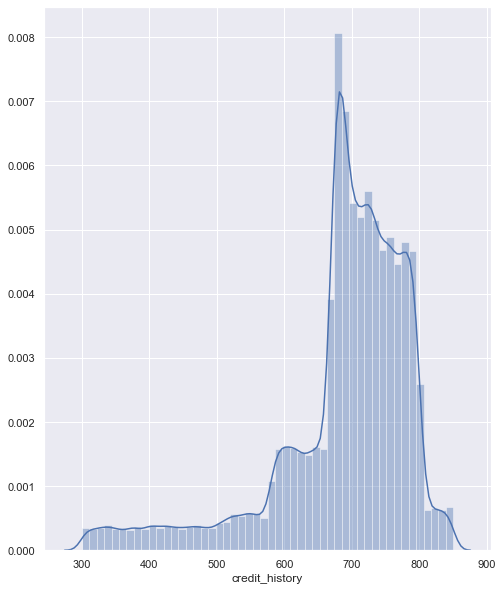

In [14]:
sns.distplot(df.credit_history)
sns.set(rc={"figure.figsize":(8,8)})

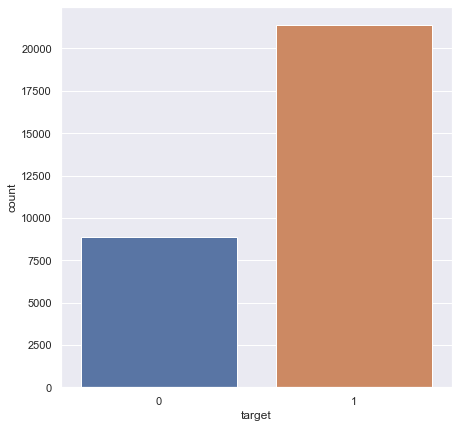

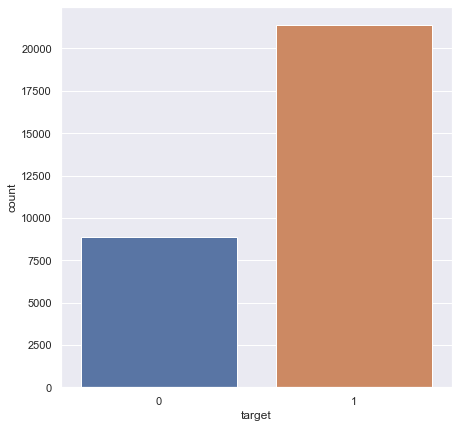

In [15]:
sns.set(rc={"figure.figsize":(7,7)})
sns.countplot(x="target",data=df)

In [16]:
df["target"].unique()


array([1, 0], dtype=int64)

array([1, 0], dtype=int64)

In [17]:
# df=df.select_dtypes([np.int,np.float])
# for i,col in enumerate(df.columns):
#     plt.figure(i)
#     sns.boxplot(x="credit_history",y=col,data=df)

In [18]:
df.head()


,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Age_bucket,EngineHP_bucket,Years_Experience_bucket,Miles_driven_annually_bucket,credit_history_bucket
0,1,F,522,656,1,0,Married,Car,14749.0,5,<18,>350,<3,<15k,Fair
1,1,F,691,704,16,0,Married,Car,15389.0,6,28-34,>350,15-30,15k-25k,Good
2,1,M,133,691,15,0,Married,Van,9956.0,3,>40,90-160,15-30,<15k,Good
3,1,M,146,720,9,0,Married,Van,77323.0,3,18-27,90-160,9-14',>25k,Good
4,1,M,128,771,33,1,Married,Van,14183.0,4,>40,90-160,>30,<15k,Very Good


,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Age_bucket,EngineHP_bucket,Years_Experience_bucket,Miles_driven_annually_bucket,credit_history_bucket
0,1,F,522,656,1,0,Married,Car,14749.0,5,<18,>350,<3,<15k,Fair
1,1,F,691,704,16,0,Married,Car,15389.0,6,28-34,>350,15-30,15k-25k,Good
2,1,M,133,691,15,0,Married,Van,9956.0,3,>40,90-160,15-30,<15k,Good
3,1,M,146,720,9,0,Married,Van,77323.0,3,18-27,90-160,9-14',>25k,Good
4,1,M,128,771,33,1,Married,Van,14183.0,4,>40,90-160,>30,<15k,Very Good


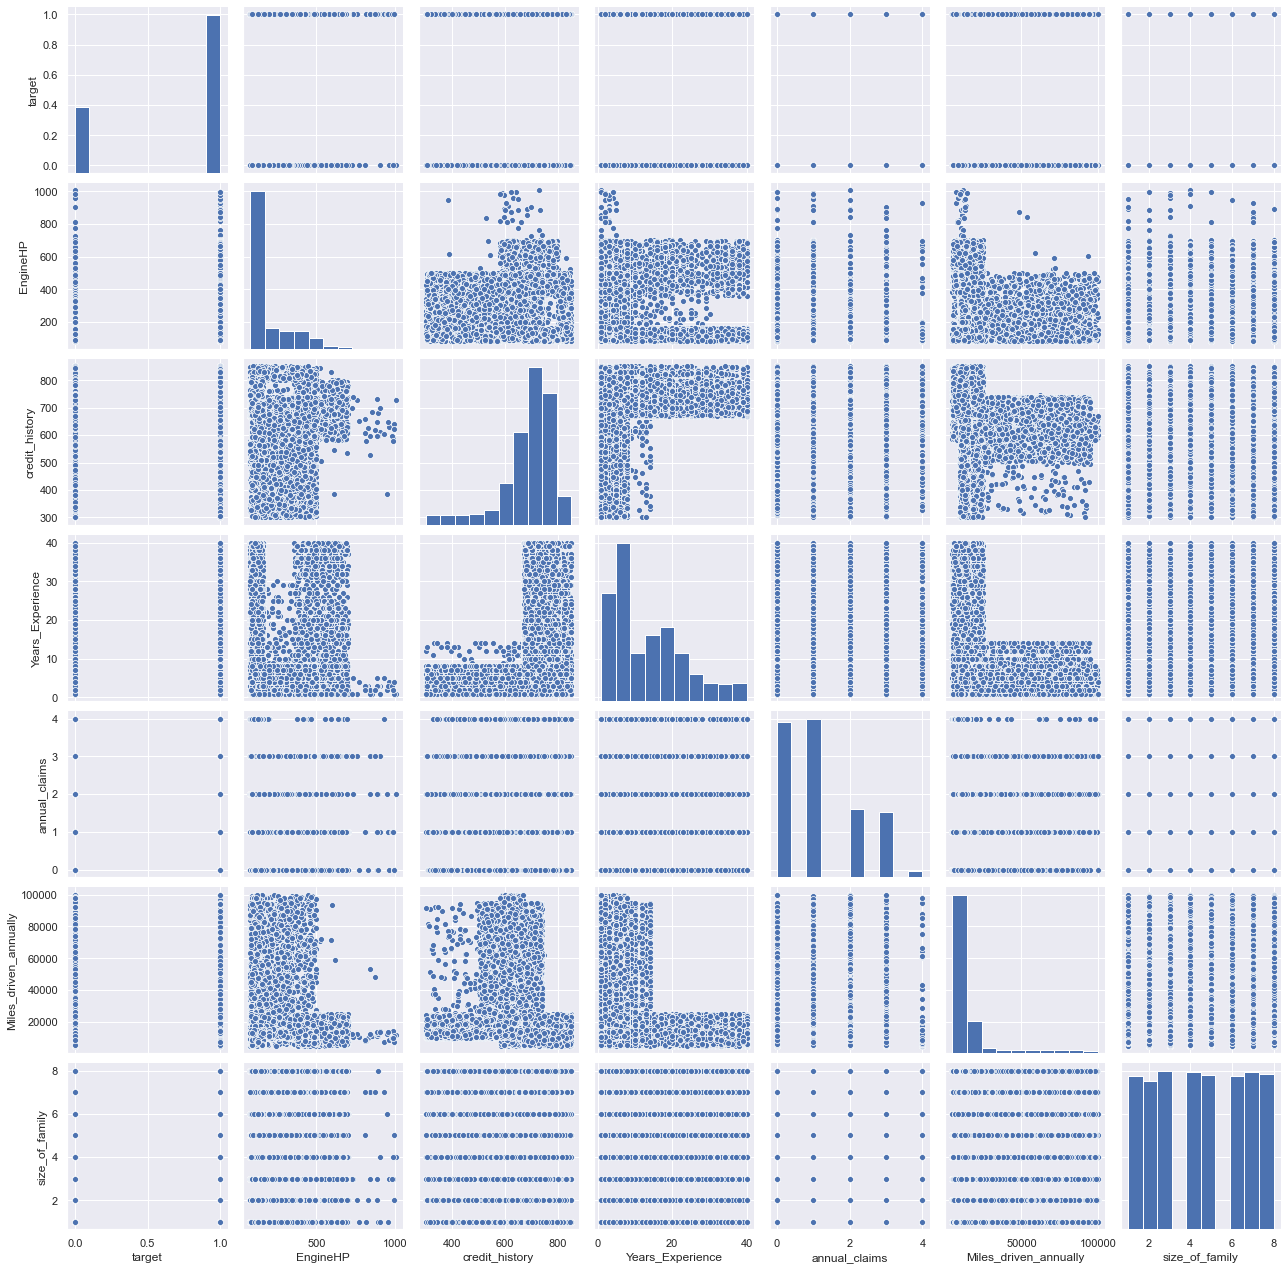

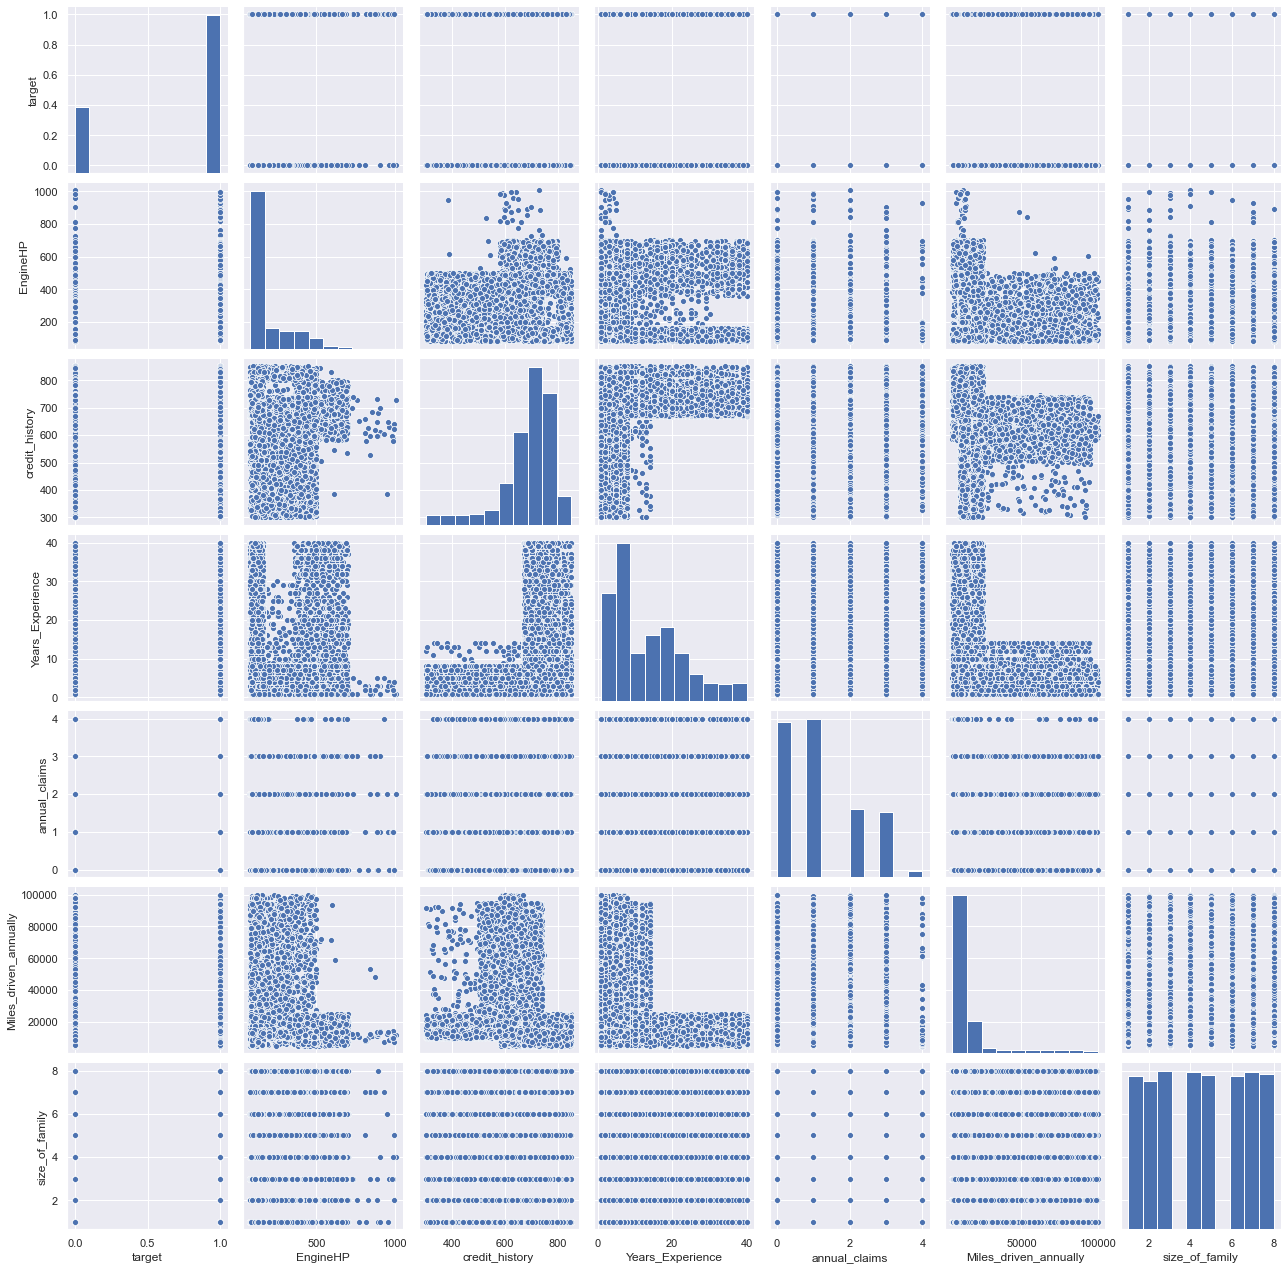

In [19]:
sns.pairplot(df)

In [20]:
Age_Bucket_dummies=pd.get_dummies(df["Age_bucket"],prefix="Age_bucket")
df.drop(["Age_bucket"],axis=1,inplace=True)
df=pd.concat([df,Age_Bucket_dummies],axis=1)


In [21]:
df.head()

,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,EngineHP_bucket,Years_Experience_bucket,Miles_driven_annually_bucket,credit_history_bucket,Age_bucket_18-27,Age_bucket_28-34,Age_bucket_35-40,Age_bucket_<18,Age_bucket_>40
0,1,F,522,656,1,0,Married,Car,14749.0,5,>350,<3,<15k,Fair,0,0,0,1,0
1,1,F,691,704,16,0,Married,Car,15389.0,6,>350,15-30,15k-25k,Good,0,1,0,0,0
2,1,M,133,691,15,0,Married,Van,9956.0,3,90-160,15-30,<15k,Good,0,0,0,0,1
3,1,M,146,720,9,0,Married,Van,77323.0,3,90-160,9-14',>25k,Good,1,0,0,0,0
4,1,M,128,771,33,1,Married,Van,14183.0,4,90-160,>30,<15k,Very Good,0,0,0,0,1


,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,EngineHP_bucket,Years_Experience_bucket,Miles_driven_annually_bucket,credit_history_bucket,Age_bucket_18-27,Age_bucket_28-34,Age_bucket_35-40,Age_bucket_<18,Age_bucket_>40
0,1,F,522,656,1,0,Married,Car,14749.0,5,>350,<3,<15k,Fair,0,0,0,1,0
1,1,F,691,704,16,0,Married,Car,15389.0,6,>350,15-30,15k-25k,Good,0,1,0,0,0
2,1,M,133,691,15,0,Married,Van,9956.0,3,90-160,15-30,<15k,Good,0,0,0,0,1
3,1,M,146,720,9,0,Married,Van,77323.0,3,90-160,9-14',>25k,Good,1,0,0,0,0
4,1,M,128,771,33,1,Married,Van,14183.0,4,90-160,>30,<15k,Very Good,0,0,0,0,1


In [22]:
df["EngineHP_bucket"].value_counts()

90-160     17840
161-350     5458
>350        4693
<90         2249
Name: EngineHP_bucket, dtype: int64

90-160     17840
161-350     5458
>350        4693
<90         2249
Name: EngineHP_bucket, dtype: int64

In [23]:
EngineHP_bucket_dummies=pd.get_dummies(df["EngineHP_bucket"],prefix="EngineHP_bucket")
df.drop(["EngineHP_bucket"],axis=1,inplace=True)
df=pd.concat([df,EngineHP_bucket_dummies],axis=1)

In [24]:
# State_dummies=pd.get_dummies(df["State"],prefix="State")
# df.drop(["State"],axis=1,inplace=True)
# df=pd.concat([df,State_dummies],axis=1)

In [25]:
df["Vehical_type"].value_counts()

Car        11582
Truck       8798
Van         5853
Utility     4007
Name: Vehical_type, dtype: int64

Car        11582
Truck       8798
Van         5853
Utility     4007
Name: Vehical_type, dtype: int64

In [26]:
Years_Experience_bucket=pd.get_dummies(df["Years_Experience_bucket"],prefix="Years_Experience_bucket")
df.drop(['Years_Experience_bucket'],axis=1,inplace=True)
df=pd.concat([df,Years_Experience_bucket],axis=1)

In [27]:
df.head()

,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Miles_driven_annually_bucket,credit_history_bucket,Age_bucket_18-27,Age_bucket_28-34,Age_bucket_35-40,Age_bucket_<18,Age_bucket_>40,EngineHP_bucket_161-350,EngineHP_bucket_90-160,EngineHP_bucket_<90,EngineHP_bucket_>350,Years_Experience_bucket_15-30,Years_Experience_bucket_3-8',Years_Experience_bucket_9-14',Years_Experience_bucket_<3,Years_Experience_bucket_>30
0,1,F,522,656,1,0,Married,Car,14749.0,5,<15k,Fair,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,1,F,691,704,16,0,Married,Car,15389.0,6,15k-25k,Good,0,1,0,0,0,0,0,0,1,1,0,0,0,0
2,1,M,133,691,15,0,Married,Van,9956.0,3,<15k,Good,0,0,0,0,1,0,1,0,0,1,0,0,0,0
3,1,M,146,720,9,0,Married,Van,77323.0,3,>25k,Good,1,0,0,0,0,0,1,0,0,0,0,1,0,0
4,1,M,128,771,33,1,Married,Van,14183.0,4,<15k,Very Good,0,0,0,0,1,0,1,0,0,0,0,0,0,1


,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,Miles_driven_annually_bucket,credit_history_bucket,Age_bucket_18-27,Age_bucket_28-34,Age_bucket_35-40,Age_bucket_<18,Age_bucket_>40,EngineHP_bucket_161-350,EngineHP_bucket_90-160,EngineHP_bucket_<90,EngineHP_bucket_>350,Years_Experience_bucket_15-30,Years_Experience_bucket_3-8',Years_Experience_bucket_9-14',Years_Experience_bucket_<3,Years_Experience_bucket_>30
0,1,F,522,656,1,0,Married,Car,14749.0,5,<15k,Fair,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,1,F,691,704,16,0,Married,Car,15389.0,6,15k-25k,Good,0,1,0,0,0,0,0,0,1,1,0,0,0,0
2,1,M,133,691,15,0,Married,Van,9956.0,3,<15k,Good,0,0,0,0,1,0,1,0,0,1,0,0,0,0
3,1,M,146,720,9,0,Married,Van,77323.0,3,>25k,Good,1,0,0,0,0,0,1,0,0,0,0,1,0,0
4,1,M,128,771,33,1,Married,Van,14183.0,4,<15k,Very Good,0,0,0,0,1,0,1,0,0,0,0,0,0,1


In [28]:
print(df["Miles_driven_annually_bucket"])

0           <15k
1        15k-25k
2           <15k
3           >25k
4           <15k
          ...   
30235       >25k
30236       <15k
30237       >25k
30238       <15k
30239    15k-25k
Name: Miles_driven_annually_bucket, Length: 30240, dtype: object
0           <15k
1        15k-25k
2           <15k
3           >25k
4           <15k
          ...   
30235       >25k
30236       <15k
30237       >25k
30238       <15k
30239    15k-25k
Name: Miles_driven_annually_bucket, Length: 30240, dtype: object


In [29]:
Miles_driven_annually_bucket=pd.get_dummies(df["Miles_driven_annually_bucket"],prefix="Miles_driven_annually_bucket")
df.drop(["Miles_driven_annually_bucket"],axis=1,inplace=True)
df=pd.concat([df,Miles_driven_annually_bucket],axis=1)

In [30]:
from sklearn import preprocessing
object = preprocessing.LabelEncoder ()
df["credit_history_bucket"]=object.fit_transform(df["credit_history_bucket"])
print(df["credit_history_bucket"].unique())

[1 2 3 0 4]
[1 2 3 0 4]


In [31]:
df["credit_history_bucket"].unique()

array([1, 2, 3, 0, 4])

array([1, 2, 3, 0, 4])

In [32]:
df["Gender"]=df["Gender"].map({"F":0,"M":1})

In [33]:
df["Marital_Status"]=df["Marital_Status"].map({"Married":0,"Single":1})

In [34]:
df["Vehical_type"]=df["Vehical_type"].map({"Car":1,"Truck":2,"Van":3,"Utility":4})

In [35]:
df.head()

,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,credit_history_bucket,Age_bucket_18-27,Age_bucket_28-34,Age_bucket_35-40,Age_bucket_<18,Age_bucket_>40,EngineHP_bucket_161-350,EngineHP_bucket_90-160,EngineHP_bucket_<90,EngineHP_bucket_>350,Years_Experience_bucket_15-30,Years_Experience_bucket_3-8',Years_Experience_bucket_9-14',Years_Experience_bucket_<3,Years_Experience_bucket_>30,Miles_driven_annually_bucket_15k-25k,Miles_driven_annually_bucket_<15k,Miles_driven_annually_bucket_>25k
0,1,0,522,656,1,0,0,1,14749.0,5,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
1,1,0,691,704,16,0,0,1,15389.0,6,2,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
2,1,1,133,691,15,0,0,3,9956.0,3,2,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
3,1,1,146,720,9,0,0,3,77323.0,3,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,1,1,128,771,33,1,0,3,14183.0,4,3,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0


,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,credit_history_bucket,Age_bucket_18-27,Age_bucket_28-34,Age_bucket_35-40,Age_bucket_<18,Age_bucket_>40,EngineHP_bucket_161-350,EngineHP_bucket_90-160,EngineHP_bucket_<90,EngineHP_bucket_>350,Years_Experience_bucket_15-30,Years_Experience_bucket_3-8',Years_Experience_bucket_9-14',Years_Experience_bucket_<3,Years_Experience_bucket_>30,Miles_driven_annually_bucket_15k-25k,Miles_driven_annually_bucket_<15k,Miles_driven_annually_bucket_>25k
0,1,0,522,656,1,0,0,1,14749.0,5,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
1,1,0,691,704,16,0,0,1,15389.0,6,2,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
2,1,1,133,691,15,0,0,3,9956.0,3,2,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
3,1,1,146,720,9,0,0,3,77323.0,3,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,1,1,128,771,33,1,0,3,14183.0,4,3,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0


In [36]:
df.dropna()

,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,credit_history_bucket,Age_bucket_18-27,Age_bucket_28-34,Age_bucket_35-40,Age_bucket_<18,Age_bucket_>40,EngineHP_bucket_161-350,EngineHP_bucket_90-160,EngineHP_bucket_<90,EngineHP_bucket_>350,Years_Experience_bucket_15-30,Years_Experience_bucket_3-8',Years_Experience_bucket_9-14',Years_Experience_bucket_<3,Years_Experience_bucket_>30,Miles_driven_annually_bucket_15k-25k,Miles_driven_annually_bucket_<15k,Miles_driven_annually_bucket_>25k
0,1,0,522,656,1,0,0,1,14749.0,5,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
1,1,0,691,704,16,0,0,1,15389.0,6,2,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
2,1,1,133,691,15,0,0,3,9956.0,3,2,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
3,1,1,146,720,9,0,0,3,77323.0,3,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,1,1,128,771,33,1,0,3,14183.0,4,3,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30235,1,0,398,491,6,3,1,2,14509.0,2,4,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
30236,0,1,128,745,22,4,1,4,8597.0,6,3,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
30237,0,1,89,523,4,1,0,2,49747.0,2,4,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
30238,1,0,129,703,14,1,0,2,7553.0,1,2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0


,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehical_type,Miles_driven_annually,size_of_family,credit_history_bucket,Age_bucket_18-27,Age_bucket_28-34,Age_bucket_35-40,Age_bucket_<18,Age_bucket_>40,EngineHP_bucket_161-350,EngineHP_bucket_90-160,EngineHP_bucket_<90,EngineHP_bucket_>350,Years_Experience_bucket_15-30,Years_Experience_bucket_3-8',Years_Experience_bucket_9-14',Years_Experience_bucket_<3,Years_Experience_bucket_>30,Miles_driven_annually_bucket_15k-25k,Miles_driven_annually_bucket_<15k,Miles_driven_annually_bucket_>25k
0,1,0,522,656,1,0,0,1,14749.0,5,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
1,1,0,691,704,16,0,0,1,15389.0,6,2,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
2,1,1,133,691,15,0,0,3,9956.0,3,2,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
3,1,1,146,720,9,0,0,3,77323.0,3,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,1,1,128,771,33,1,0,3,14183.0,4,3,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30235,1,0,398,491,6,3,1,2,14509.0,2,4,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
30236,0,1,128,745,22,4,1,4,8597.0,6,3,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
30237,0,1,89,523,4,1,0,2,49747.0,2,4,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
30238,1,0,129,703,14,1,0,2,7553.0,1,2,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0


In [37]:
print('The shape of data after all preprocessing ',df.shape)

The shape of data after all preprocessing  (30240, 28)
The shape of data after all preprocessing  (30240, 28)


In [38]:
df['target'].value_counts()

1    21396
0     8844
Name: target, dtype: int64

1    21396
0     8844
Name: target, dtype: int64

In [39]:
df['target'].mean()

0.7075396825396826

0.7075396825396826

In [40]:
21396/(21396+8844)

0.7075396825396826

0.7075396825396826

In [41]:
8844/(21396+8844)

0.2924603174603175

0.2924603174603175

In [42]:
x=df.drop(["target"],axis=1)
y=df["target"]

In [43]:
#!pip install imbalanced-learn

In [44]:
# # Drop the 'target' column from training dataframe as that is our label
# X = df.drop(['target', 'State'],axis=1)

# # The 'target' column is our label or outcome that we want to predict
# y = df['target']

# # Use pd.dummies to resolve the categorical data (e.g. State) into numerical values
# #X = pd.get_dummies(X)

# # Drop and NaN values
# #X = X.dropna(axis=1)

In [45]:
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split

# os = SMOTE(random_state=0)

# columns = x.columns
# os_data_x, os_data_y = os.fit_sample(x, y)
# os_data_x = pd.DataFrame(data=os_data_x, columns=columns)
# os_data_y = pd.DataFrame(data=os_data_y, columns=['y'])

# # Split the resulting balanced data set as train and test

# x_train, x_test, y_train, y_test = train_test_split(
#     os_data_X, os_data_y, test_size=0.3, random_state=0)

# # Check the size of our new data
# print("length of oversampled data is ", len(os_data_x))
# print("Number of negative class in oversampled data",
#       len(os_data_y[os_data_y['y'] == 0]))
# print("Number of positive class in oversampled data",
#       len(os_data_y[os_data_y['y'] == 1]))
# print("Proportion of negative class in oversampled data is ",
#       len(os_data_y[os_data_y['y'] == 0])/len(os_data_x))
# print("Proportion of positive class in oversampled data is ",
#       len(os_data_y[os_data_y['y'] == 1])/len(os_data_x))

In [46]:
# ##Train Test Split
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,train_size=0.6,random_state=12,stratify=y)

In [47]:
# x_train =  x_train.values.reshape(-1,1)     #you want to convert the data in single column
# x_test = x_test.values.reshape(-1,1)
# y_train =  y_train.values.reshape(-1,1)     #you want to convert the data in single column
# y_test = y_test.values.reshape(-1,1)

In [48]:
# ## Standardize the dataset
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()



In [49]:
# x_train=scaler.fit_transform(x_train)
# x_train

In [50]:
# x_test=scaler.transform(x_test)

In [51]:

# df = df.dropna(axis=1,inplace=True)

In [52]:
# x_train =  x_train.values.reshape(-1,1)     #you want to convert the data in single column
# x_test = x_test.values.reshape(-1,1)
# y_train =  y_train.values.reshape(-1,1)     #you want to convert the data in single column
# y_test = y_test.values.reshape(-1,1)

In [53]:
x = df.drop(["target"],axis = 1)

In [54]:
y = df.target

In [55]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scaled = ss.fit_transform(x)

In [56]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x_scaled, y)
print(y.value_counts())
print("############")
print(y_ros.value_counts())

1    21396
0     8844
Name: target, dtype: int64
############
1    21396
0    21396
Name: target, dtype: int64
1    21396
0     8844
Name: target, dtype: int64
############
1    21396
0    21396
Name: target, dtype: int64


In [57]:
### PCA####

pca = PCA(n_components = 12)
df_pca = pca.fit_transform(X=x_ros)    #unsupervised models: fit_transform happens in a single go!



In [58]:
df_pca = pd.DataFrame(df_pca)
print(df_pca.shape) 
df_pca.round(2).head()

(42792, 12)
(42792, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,1.71,-0.38,4.80,-0.12,-1.58,3.51,-1.01,-0.10,4.51,0.17,-0.08,-0.91
1,0.78,2.66,3.68,3.17,-1.30,1.37,-0.30,0.06,-1.15,2.57,0.30,1.51
2,-2.65,-0.44,-0.09,-0.74,-0.38,0.17,-1.09,0.04,-0.27,0.29,-0.86,-0.21
3,0.67,-3.16,-0.18,1.42,-0.06,-0.19,2.01,0.19,-0.18,-0.56,-0.71,-0.61
4,-3.14,0.40,0.38,-2.08,0.54,-1.28,2.40,-0.80,0.88,0.41,-0.17,1.02


,0,1,2,3,4,5,6,7,8,9,10,11
0,1.71,-0.38,4.80,-0.12,-1.58,3.51,-1.01,-0.10,4.51,0.17,-0.08,-0.91
1,0.78,2.66,3.68,3.17,-1.30,1.37,-0.30,0.06,-1.15,2.57,0.30,1.51
2,-2.65,-0.44,-0.09,-0.74,-0.38,0.17,-1.09,0.04,-0.27,0.29,-0.86,-0.21
3,0.67,-3.16,-0.18,1.42,-0.06,-0.19,2.01,0.19,-0.18,-0.56,-0.71,-0.61
4,-3.14,0.40,0.38,-2.08,0.54,-1.28,2.40,-0.80,0.88,0.41,-0.17,1.02


In [59]:
y = df.target

In [60]:
X = x_ros
Y = y_ros

In [61]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 42,train_size = 0.8)


In [ ]:
list_met = []
list_accuracy = []

# Model 1
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')
lr = classifier.fit(x_train, y_train)
# Prediction
y_pred = classifier.predict(x_test)
# Accuarcy
accuracy_LR = accuracy_score(y_test, y_pred)

# Model 2
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(random_state=14)
dt = classifier2.fit(x_train, y_train)
# prediction
y_pred2 = classifier2.predict(x_test)
# evaluation
accuracy_DT = accuracy_score(y_test, y_pred2)

# Model 3 
# criteria - gini
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(random_state=14)
rfi = classifier3.fit(x_train, y_train)
#prediction
y_pred3 = classifier3.predict(x_test)
# evaluation
accuracy_RFI = accuracy_score(y_test, y_pred3)

# Model 4
classifier4 = RandomForestClassifier(criterion='entropy', random_state=14)
rfe = classifier4.fit(x_train, y_train)
# predict
y_pred4 = classifier4.predict(x_test)
# evaluation
accuracy_RFE = accuracy_score(y_test, y_pred4)

# Model 5
from sklearn.svm import SVC

model_svm = SVC()
SVM = model_svm.fit(x_train, y_train)
#prediction
y_pred5 = model_svm.predict(x_test)
# evaluation
accuracy_SVC = accuracy_score(y_test, y_pred5)

# Model 6
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
knn = model_knn.fit(x_train, y_train)
#prediction
pred_knn = model_knn.predict(x_test)
# evaluation
accuracy_knn = accuracy_score(y_test, pred_knn)

# model 7
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train)
# prediction
pred_gnb = gnb.predict(x_test)
# evaluation
accuracy_GNB = accuracy_score(y_test, pred_gnb)

# model 8
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
bnb = model.fit(x_train, y_train)
# prediction
pred_bnb = bnb.predict(x_test)
# evaluation
accuracy_BNB = accuracy_score(y_test, pred_bnb)

# combining all the above model by using voting classifier model

from sklearn.ensemble import VotingClassifier

evc = VotingClassifier(estimators = [('lr', lr), ('DT', dt), ('RFI', rfi),('RFE', rfe),
                                     ('SVC', SVM), ('KNN', knn),('GNB', gnb),
                                    ('BNB', bnb)], voting = 'hard',
                                    flatten_transform=True)
model_evc = evc.fit(x_train, y_train)
# prediction
pred_evc = evc.predict(x_test)
# evaluation
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ["Logistic Regression",'Decision Tree','RandomForest Gini', 'RandomForest Entropy',
        'Support Vector','K Nearest Neighbors','GuassionNB','BernoulliNB','Voting Classifier']

list2 = [accuracy_LR,accuracy_DT,accuracy_RFI,accuracy_RFE,accuracy_SVC,accuracy_knn,
        accuracy_GNB,accuracy_BNB, accuracy_evc]

list3 = [classifier,classifier2,classifier3,classifier4,model_svm,model_knn,
        gnb,model,model_evc]

df_accuracy = pd.DataFrame({'Method Used' :list1, "Accuracy" :list2})
print(df_accuracy)

charts = sns.barplot(x='Method Used', y = 'Accuracy', data=df_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

In [ ]:
# Providing the different values of hyperparameters
model2 = RandomForestClassifier(random_state=64)
param_dist = {'max_depth': [2, 3, 4, 8],
              'max_features': ['auto', 'sqrt', 'log2', None],
                'bootstrap' : [True, False],
              'criterion': ['gini', 'entropy']}

# Running gridsearchCV to check for all the different PnCs of these parameter values
cv_rf = GridSearchCV(model2, cv = 10,
                     param_grid=param_dist, verbose = True,
                     n_jobs = 3)

#Fitting the train set , so that grid search is executed on this dataset
cv_rf.fit(x_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


C:\Users\890234.CTS\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=64), n_jobs=3,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 8],
                         'max_features': ['auto', 'sqrt', 'log2', None]},
             verbose=True)

In [ ]:
#Printing the best parameters by using best_params
print('Best Parameters using grid search: \n', cv_rf.best_params_) 

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}


In [ ]:
#Finally the best parameters are specified

model2.set_params(criterion = 'gini',
                  max_features = None, 
                  bootstrap = True,
                  max_depth = 8)
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 0.5086320217334152
Testing accuracy : 0.5085874518051174


In [ ]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.48      0.49      4297
           1       0.50      0.52      0.51      4262

    accuracy                           0.50      8559
   macro avg       0.50      0.50      0.50      8559
weighted avg       0.50      0.50      0.50      8559

[[2079 2218]
 [2062 2200]]


In [ ]:
list_met = []
list_accuracy = []

# Model 1
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')
lr = classifier.fit(X_train, y_train)
# Prediction
y_pred = classifier.predict(X_test)
# Accuarcy
accuracy_LR = accuracy_score(y_test, y_pred)

# Model 2
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(random_state=14)
dt = classifier2.fit(X_train, y_train)
# prediction
y_pred2 = classifier2.predict(X_test)
# evaluation
accuracy_DT = accuracy_score(y_test, y_pred2)

# Model 3 
# criteria - gini
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(random_state=14)
rfi = classifier3.fit(X_train, y_train)
#prediction
y_pred3 = classifier3.predict(X_test)
# evaluation
accuracy_RFI = accuracy_score(y_test, y_pred3)

# Model 4
classifier4 = RandomForestClassifier(criterion='entropy', random_state=14)
rfe = classifier4.fit(X_train, y_train)
# predict
y_pred4 = classifier4.predict(X_test)
# evaluation
accuracy_RFE = accuracy_score(y_test, y_pred4)

# Model 5
from sklearn.svm import SVC

model_svm = SVC()
SVM = model_svm.fit(X_train, y_train)
#prediction
y_pred5 = model_svm.predict(X_test)
# evaluation
accuracy_SVC = accuracy_score(y_test, y_pred5)

# Model 6
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
knn = model_knn.fit(X_train, y_train)
#prediction
pred_knn = model_knn.predict(X_test)
# evaluation
accuracy_knn = accuracy_score(y_test, pred_knn)

# model 7
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
# prediction
pred_gnb = gnb.predict(X_test)
# evaluation
accuracy_GNB = accuracy_score(y_test, pred_gnb)

# model 8
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
bnb = model.fit(X_train, y_train)
# prediction
pred_bnb = bnb.predict(X_test)
# evaluation
accuracy_BNB = accuracy_score(y_test, pred_bnb)

# combining all the above model by using voting classifier model

from sklearn.ensemble import VotingClassifier

evc = VotingClassifier(estimators = [('lr', lr), ('DT', dt), ('RFI', rfi),('RFE', rfe),
                                     ('SVC', SVM), ('KNN', knn),('GNB', gnb),
                                    ('BNB', bnb)], voting = 'hard',
                                    flatten_transform=True)
model_evc = evc.fit(X_train, y_train)
# prediction
pred_evc = evc.predict(X_test)
# evaluation
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ["Logistic Regression",'Decision Tree','RandomForest Gini', 'RandomForest Entropy',
        'Support Vector','K Nearest Neighbors','GuassionNB','BernoulliNB','Voting Classifier']

list2 = [accuracy_LR,accuracy_DT,accuracy_RFI,accuracy_RFE,accuracy_SVC,accuracy_knn,
        accuracy_GNB,accuracy_BNB, accuracy_evc]

list3 = [classifier,classifier2,classifier3,classifier4,model_svm,model_knn,
        gnb,model,model_evc]

df_accuracy = pd.shopping({'Method Used' :list1, "Accuracy" :list2})
print(df_accuracy)

charts = sns.barplot(x='Method Used', y = 'Accuracy', data=df_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
